# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

In [302]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [403]:
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips['tip_pct'] = tips['tip_pct']*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,6.320401
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,19.124424
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,19.988578
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,16.249386
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,17.206864


In [417]:
regr = smf.ols('tip ~ net_bill', data=tips).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        12:26:24   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

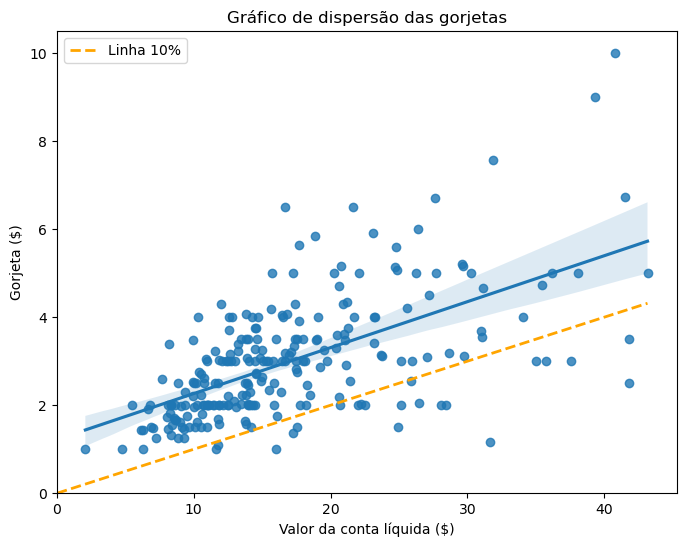

In [409]:
plt.rc('figure', figsize=(8, 6))
       
sns.regplot(data=tips[tips['tip_pct']<50],
            x = 'net_bill',
            y = 'tip'
           )

plt.plot(np.linspace(0,tips['net_bill'].max(),100),
         .1*x,
         lw=2,
         linestyle='--',
         c='orange',
         label ='Linha 10%'
        )

plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.ylabel('Gorjeta ($)')
plt.xlabel('Valor da conta líquida ($)')
plt.title('Gráfico de dispersão das gorjetas')
plt.legend()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [419]:
regr1 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
regr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        12:26:29   Log-Likelihood:                -1015.7
No. Observations:                 244   AIC:                             2035.
Df Residuals:                     242   BIC:                             2042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5297      2.319     13.166      0.000      25.962      35.097
net_bill      -0.6146      0.125     -4.931      0.000      -0.860      -0.369
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

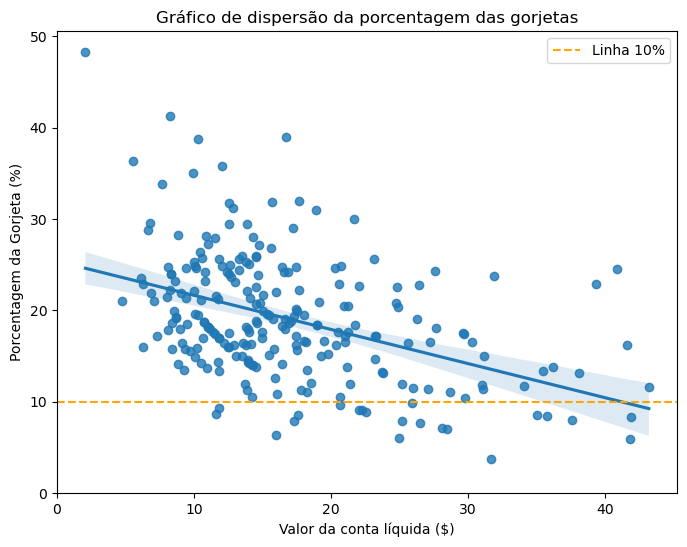

In [483]:

sns.regplot(data=tips[tips['tip_pct']<50],
            x = 'net_bill',
            y = 'tip_pct'
           )
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.axhline(y=10,
            color='orange',
            linestyle='--',
            label='Linha 10%'
           )

plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.ylabel('Porcentagem da Gorjeta (%)')
plt.xlabel('Valor da conta líquida ($)')
plt.title('Gráfico de dispersão da porcentagem das gorjetas')
plt.legend()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

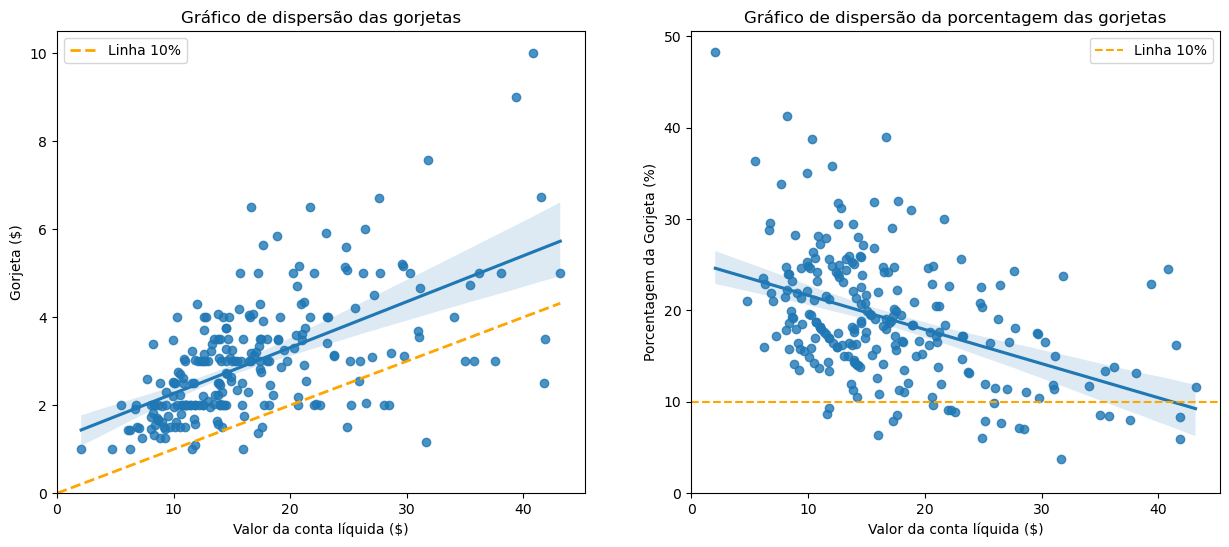

In [481]:
fig, axes = plt.subplots(1,2, figsize=(15, 6))

ax1 = axes[0]
sns.regplot(data=tips[tips['tip_pct']<50],
            x = 'net_bill',
            y = 'tip',
            ax=ax1
           )
ax1.plot(np.linspace(0,tips['net_bill'].max(),100),
         .1*x,
         lw=2,
         linestyle='--',
         c='orange',
         label ='Linha 10%'
        )
ax1.set_xlim(left = 0)
ax1.set_ylim(bottom = 0)
ax1.set_ylabel('Gorjeta ($)')
ax1.set_xlabel('Valor da conta líquida ($)')
ax1.set_title('Gráfico de dispersão das gorjetas')
ax1.legend()


ax2 = axes[1]
sns.regplot(data=tips[tips['tip_pct']<50],
            x = 'net_bill',
            y = 'tip_pct',
            ax=ax2
           )
ax2.axhline(y=10,
            color='orange',
            linestyle='--',
            label='Linha 10%'
           )
ax2.set_xlim(left = 0)
ax2.set_ylim(bottom = 0)
ax2.set_ylabel('Porcentagem da Gorjeta (%)')
ax2.set_xlabel('Valor da conta líquida ($)')
ax2.set_title('Gráfico de dispersão da porcentagem das gorjetas')
ax2.legend()

Como observado nos gráficos, nota-se uma tendência de contas com os valores mais altos possuírem gorjetas maiores, enquanto a porcentagem da mesma cai consoante ao aumento no valor da conta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [465]:
pred_pct = regr1.fittedvalues.to_frame()
pred_pct.columns = ['tip_pct']
pred_pct

,tip_pct
0,20.708721
1,25.195136
2,19.768418
3,18.010727
4,17.635835
...,...
239,16.326785
240,15.054610
241,17.826354
242,20.653409


In [469]:
pred_tip = regr.fittedvalues.to_frame()
pred_tip.columns = ['tip']
pred_tip

,tip
0,2.918050
1,2.192915
2,3.070031
3,3.354125
4,3.414719
...,...
239,3.626300
240,3.831920
241,3.383925
242,2.926990


In [479]:
regr.rsquared

0.3325407312323705

In [477]:
regr1.rsquared

0.09129084920662967